In [20]:
import pandas as pd
import wbgapi as wb
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [214]:
country_codes = ['EGY','MDG','NGA','IND','JPN','QAT','ITA','ESP','FRA','DEU']

In [269]:
# write your code here

# indicators for getting data related to specified indicator
indicator_ids= ['FI.RES.TOTL.CD','NY.GDP.PCAP.CD','SP.POP.GROW','PA.NUS.FCRF','NY.GDP.PETR.RT.ZS']

# mapping a readable name to each indicators to avoid confusion
indicator_dict = {
    'FI.RES.TOTL.CD':'TOTAL RESERVE',
    'NY.GDP.PCAP.CD':'GDP',
    'SP.POP.GROW' : 'POPULATION',
    'PA.NUS.FCRF':'EXCHANGE_RATE',
    'NY.GDP.PETR.RT.ZS':'OIL RENT'
}

In [270]:
wb.series.info(indicator_ids)

id,value
NY.GDP.PCAP.CD,GDP per capita (current US$)
PA.NUS.FCRF,"Official exchange rate (LCU per US$, period average)"
NY.GDP.PETR.RT.ZS,Oil rents (% of GDP)
SP.POP.GROW,Population growth (annual %)
FI.RES.TOTL.CD,"Total reserves (includes gold, current US$)"
,5 elements


In [265]:
raw_df  = wb.data.DataFrame(indicator_ids, country_codes, time=range(2000, 2009))
df = raw_df
# print(df)
df.reset_index()
df = df.reset_index(level=['economy', 'series'])
df = df.set_axis(['country','indicators','2012','2013','2014','2015','2016','2017','2018','2019','2020'],axis=1)
df = df.set_index('indicators')
df = df.rename(index=indicator_dict)
df = df.reset_index(level=['indicators'])
df = df.set_index(['country','indicators'])
stacked = df.stack()
df = stacked.unstack('indicators')
print(df)
df['GDP'].isnull().values.any()

indicators    EXCHANGE_RATE           GDP         OR        POP           RES
country                                                                      
DEU     2012       1.082705  23694.760483   0.019089   0.135432  8.749687e+10
        2013       1.116533  23628.327212   0.014586   0.168225  8.213189e+10
        2014       1.057559  25197.265600   0.015561   0.168128  8.914254e+10
        2015       0.884048  30310.357596   0.016072   0.055363  9.683521e+10
        2016       0.803922  34106.658122   0.018199  -0.021710  9.716997e+10
...                     ...           ...        ...        ...           ...
QAT     2016       3.640000  42124.940842  34.057801   9.978287  3.414203e+09
        2017       3.640000  51455.950943  38.876673  13.869735  4.552171e+09
        2018       3.640000  59530.561000  34.540148  16.700200  5.394809e+09
        2019       3.640000  65421.376917  30.798918  17.512207  9.749046e+09
        2020       3.640000  80234.190834  31.114773  16.475576 

False

In [266]:
df = norm_df(df)
df

indicators    EXCHANGE_RATE       GDP        OR       POP       RES
country                                                            
DEU     2012       1.082705  0.292813  0.000491  0.018392  0.084632
        2013       1.116533  0.291982  0.000375  0.020244  0.079426
        2014       1.057559  0.311606  0.000400  0.020239  0.086229
        2015       0.884048  0.375559  0.000413  0.013869  0.093694
        2016       0.803922  0.423043  0.000468  0.009515  0.094019
...                     ...       ...       ...       ...       ...
QAT     2016       3.640000  0.523335  0.876047  0.574411  0.003036
        2017       3.640000  0.640046  1.000000  0.794238  0.004141
        2018       3.640000  0.741042  0.888454  0.954130  0.004959
        2019       3.640000  0.814723  0.792221  1.000000  0.009184
        2020       3.640000  1.000000  0.800346  0.941441  0.009424

[90 rows x 5 columns]

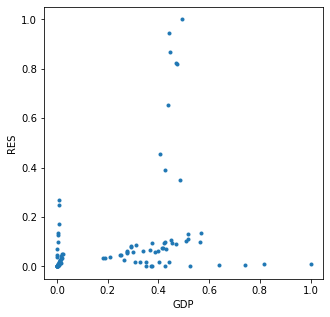

In [267]:
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
makeplot(df, "GDP", "RES")
# makeplot(df, "maternal_death", "out_pocket_expe")
# makeplot(df, "YR2011", "YR2019")

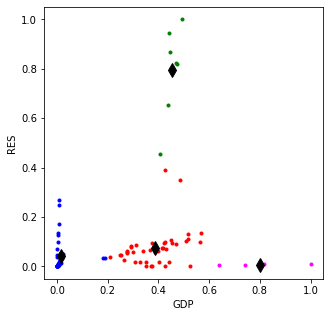

In [268]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df[["GDP", "RES"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["GDP"][labels==l], df_fit["RES"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("GDP")
plt.ylabel("RES")
plt.show()